# Potato Disease Classification using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
#IMAGE_SIZE = 256
#BATCH_SIZE = 32
#size_tensor = torch.tensor([new_height, new_width])

In [4]:
data = tf.keras.preprocessing.image_dataset_from_directory(
  "PlantVillage",
   shuffle=True,
   image_size= (256,256),
   batch_size= 32
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = data.class_names

In [6]:
len(data)

68

In [7]:
# 68 comes from batch size *  X (68)= 32* X = 2152 
                                #   X = 2152/32
                                #   x = 68.00
len(data)*32/32

68.0

In [8]:
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print (label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0]


In [9]:
# required variables
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [10]:
## tensor to numpy array conversion 
# print(image_batch[0]) = tf
# print(image_batch[0].numby = numpy array

print(image_batch[0].numpy())

[[[181. 184. 193.]
  [180. 183. 192.]
  [179. 182. 191.]
  ...
  [159. 161. 174.]
  [157. 159. 172.]
  [156. 158. 171.]]

 [[180. 183. 192.]
  [179. 182. 191.]
  [179. 182. 191.]
  ...
  [161. 163. 176.]
  [161. 163. 176.]
  [161. 163. 176.]]

 [[178. 181. 190.]
  [178. 181. 190.]
  [178. 181. 190.]
  ...
  [162. 164. 177.]
  [165. 167. 180.]
  [166. 168. 181.]]

 ...

 [[115. 114. 122.]
  [116. 115. 123.]
  [109. 108. 116.]
  ...
  [156. 154. 165.]
  [129. 127. 138.]
  [132. 130. 141.]]

 [[ 88.  87.  95.]
  [112. 111. 119.]
  [120. 119. 127.]
  ...
  [140. 138. 149.]
  [156. 154. 165.]
  [126. 124. 135.]]

 [[ 92.  91.  99.]
  [126. 125. 133.]
  [ 96.  95. 103.]
  ...
  [129. 127. 138.]
  [130. 128. 139.]
  [147. 145. 156.]]]


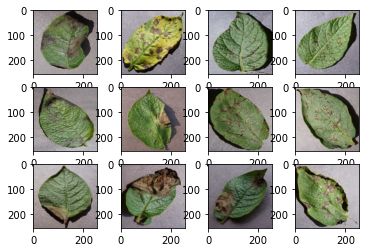

In [11]:
for image_batch, labels_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

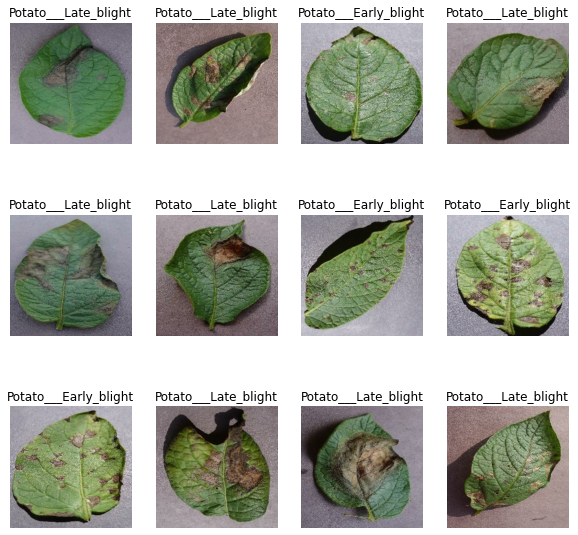

In [12]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
len(data)

68

In [14]:
train_size = 0.8
len(data)*train_size

54.400000000000006

# Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [15]:
train_ds = data.take(54)
len(train_ds)

54

In [16]:
test_ds = data.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(data)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

# Vary Important Section to Understand
Practice as much as i can

In [20]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    # Use the correct variable name 'train_split' instead of 'trin_split'
    assert (train_split + val_split) <= 1  # Also, fixed the assertion condition
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)  # Corrected the calculation of val_size
    
    # Use 'ds.take(train_size)' to get the training set, and 'ds.skip(train_size).take(val_size)' for validation and test sets
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)  # Corrected the skipping for test set
    
    return train_ds, val_ds, test_ds  # Removed duplicate 'val_ds'

# Example usage:
# train_set, val_set, test_set = get_dataset_partition_tf(dataset, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000)


In [21]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(data)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_rescale ,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

# Main CNN Model 

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
54/54 [==============================] - 48s 853ms/step - loss: 0.9150 - accuracy: 0.4988 - val_loss: 0.8296 - val_accuracy: 0.5729
Epoch 2/50
54/54 [==============================] - 45s 827ms/step - loss: 0.6834 - accuracy: 0.6782 - val_loss: 0.4927 - val_accuracy: 0.8073
Epoch 3/50
54/54 [==============================] - 45s 826ms/step - loss: 0.5966 - accuracy: 0.7494 - val_loss: 0.4712 - val_accuracy: 0.7917
Epoch 4/50
54/54 [==============================] - 44s 824ms/step - loss: 0.3641 - accuracy: 0.8484 - val_loss: 0.4109 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 44s 823ms/step - loss: 0.3687 - accuracy: 0.8675 - val_loss: 0.3014 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 45s 827ms/step - loss: 0.2609 - accuracy: 0.8976 - val_loss: 0.2776 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 45s 828ms/step - loss: 0.2132 - accuracy: 0.9138 - val_loss: 0.2254 - val_accuracy: 0.8958

In [34]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 218ms/step - loss: 0.0068 - accuracy: 0.9961


In [35]:
scores

[0.006757039111107588, 0.99609375]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
history.history["accuracy"]

[0.49884259700775146,
 0.6782407164573669,
 0.7494212985038757,
 0.8483796119689941,
 0.8674768805503845,
 0.8975694179534912,
 0.9137731194496155,
 0.9299768805503845,
 0.9571759104728699,
 0.9710648059844971,
 0.9479166865348816,
 0.9797453880310059,
 0.9913194179534912,
 0.9866898059844971,
 0.9427083134651184,
 0.9589120149612427,
 0.96875,
 0.9930555820465088,
 0.9988425970077515,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

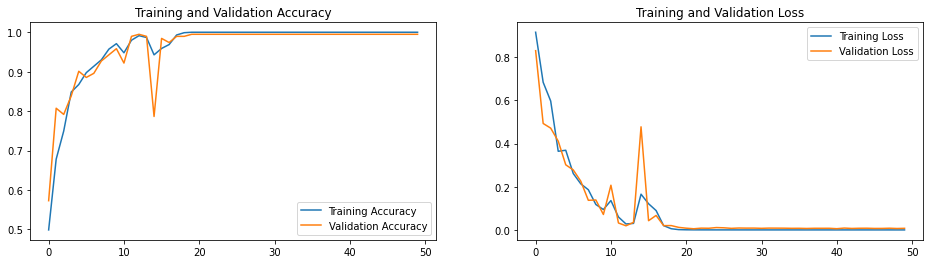

In [41]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
import numpy as np

Firdt Image to Predict
First Image's Actual label- Potato___Early_blight
1/1 [==============================] - 0s 254ms/step
Batch Prediction- Potato___Early_blight


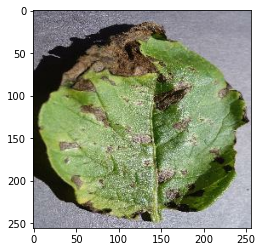

In [57]:
for image_batch, labels_batch in test_ds.take(1):
    first_image =image_batch[0].numpy().astype("uint8")      
    first_label = label_batch[0].numpy()
    
    print("Firdt Image to Predict")
    plt.imshow(first_image)
    print("First Image's Actual label-",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Batch Prediction-", class_names[np.argmax(batch_prediction[0])])

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


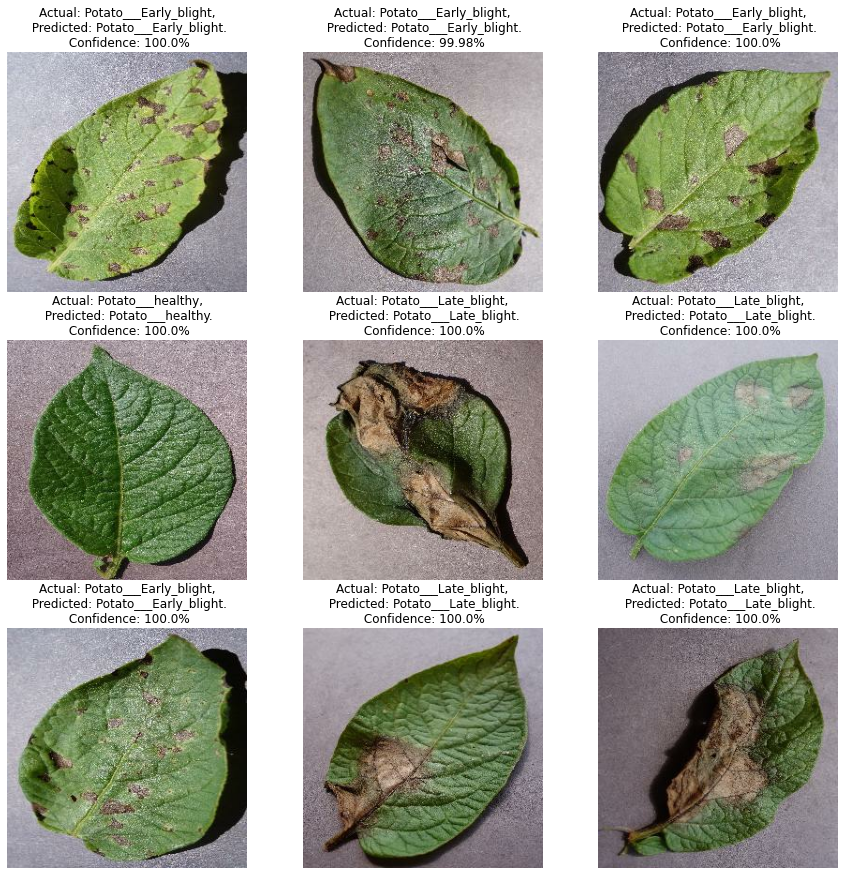

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [63]:
model_version = 1
model.save(F"/Jupyter/Deep Learning/Potato Disease Classification/model/{model_version}")

INFO:tensorflow:Assets written to: /Jupyter/Deep Learning/Potato Disease Classification/model/1\assets


INFO:tensorflow:Assets written to: /Jupyter/Deep Learning/Potato Disease Classification/model/1\assets
